# Visualización de mapas

## El primer paso y el primer mapa coroplético

In [ ]:
pip install matplotlib=='3.5.2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas=='1.3.5'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy=='1.21.6'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geopandas=='0.10.2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 31.5 MB/s 
     |████████████████████████████████| 6.3 MB 45.3 MB/s 


In [ ]:
pip install mapclassify=='2.4.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install folium=='0.12.1'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.7 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1 which is incompatible.


In [ ]:
pip install numpy=='1.21.6'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<AxesSubplot:>

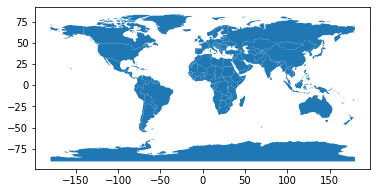

In [ ]:
# Mapa básico
world.plot()

<AxesSubplot:>

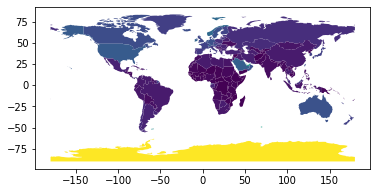

In [ ]:
# Mapa coroplético
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

## Edición de parámetros con matplotlib

<AxesSubplot:>

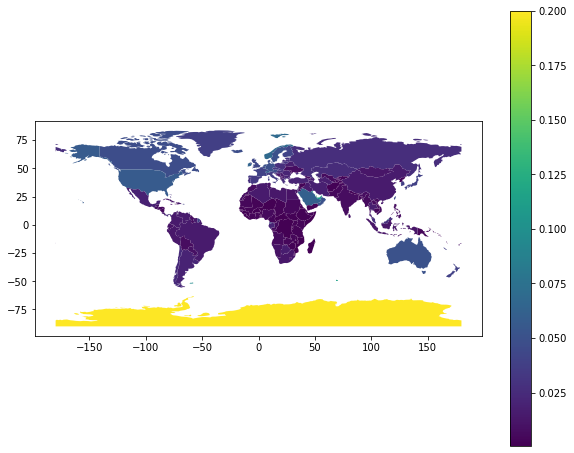

In [ ]:
# Con leyenda
fig, ax = plt.subplots(figsize = (10,8))
world.plot(column='gdp_per_cap', ax=ax, legend=True)

<AxesSubplot:>

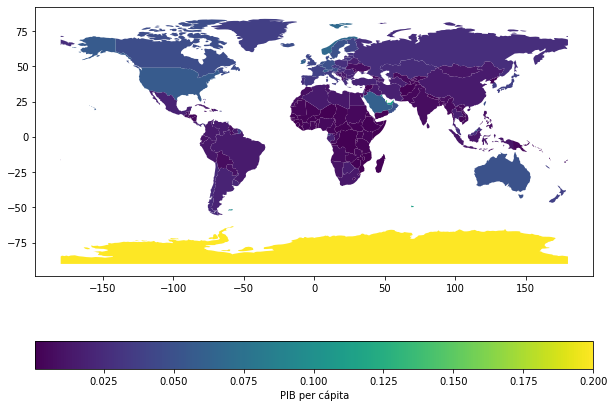

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
world.plot(column='gdp_per_cap', ax=ax, legend=True,
           legend_kwds={'label': "PIB per cápita",
                        'orientation': "horizontal"})

<AxesSubplot:>

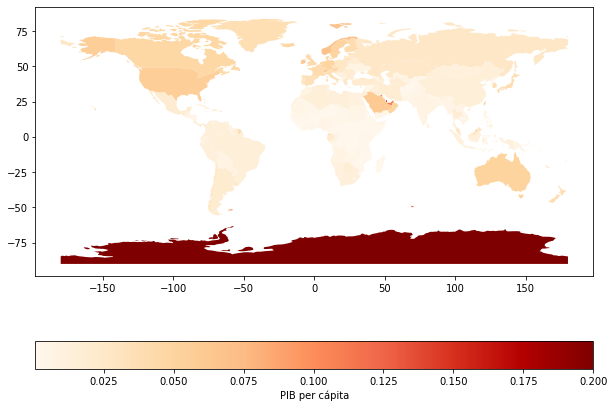

In [ ]:
# Otras escalas de color
fig, ax = plt.subplots(figsize = (10,8))
world.plot(column='gdp_per_cap', ax=ax, legend=True, cmap='OrRd',
           legend_kwds={'label': "PIB per cápita",
                        'orientation': "horizontal"})

<AxesSubplot:>

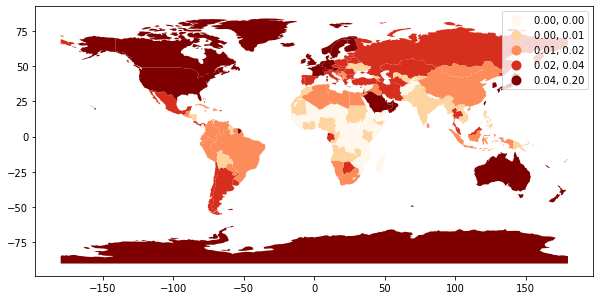

In [ ]:
# Esquema distinto
fig, ax = plt.subplots(figsize = (10,8))
world.plot(column='gdp_per_cap', ax=ax, legend=True, cmap='OrRd', scheme='quantiles')

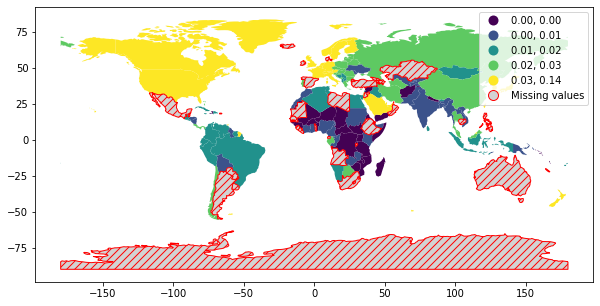

In [ ]:
# Datos perdidos
fig, ax = plt.subplots(figsize = (10,8))
world.loc[np.random.choice(world.index, 40), 'gdp_per_cap'] = np.nan
world.plot(
    column="gdp_per_cap",
    legend=True,
    ax = ax,
    scheme="quantiles",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);

## Varias capas de dibujado

In [ ]:
# Datos adicionales
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

name                   geometry
0  Vatican City  POINT (12.45339 41.90328)
1    San Marino  POINT (12.44177 43.93610)
2         Vaduz   POINT (9.51667 47.13372)
3    Luxembourg   POINT (6.13000 49.61166)
4       Palikir  POINT (158.14997 6.91664)

<AxesSubplot:>

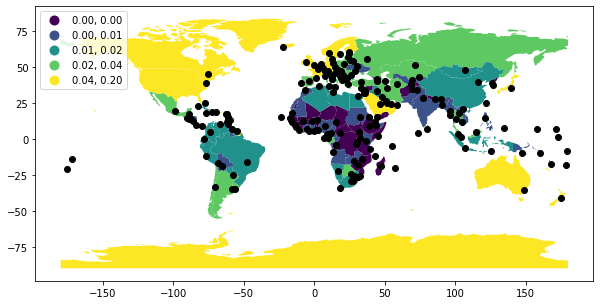

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
world.plot(column='gdp_per_cap', ax=ax, legend=True, scheme='quantiles', zorder=1)
cities.plot(color='k', zorder=2, ax=ax)

## Mapas interactivos

In [ ]:
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  gdp_per_cap  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...     0.009093  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...     0.002791  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...     0.001503  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...     0.046991  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...     0.056823

In [ ]:
world.explore(column="gdp_per_cap", tooltip="name", popup=True, tiles="CartoDB positron", style_kwds=dict(color="black"))

In [1]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import folium
import branca
import pandas as pd
import json
import requests

In [5]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
county_data = f"{url}/us_county_data.csv"
county_geo = f"{url}/us_counties_20m_topo.json"


df = pd.read_csv(county_data, na_values=[" "])

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = df.set_index("FIPS_Code")["Employed_2011"]

In [18]:
df.head()

FIPS_Code State       Area_name  Civilian_labor_force_2011  Employed_2011  \
0          0    US   United States                154505871.0    140674478.0   
1       1000    AL         Alabama                  2190519.0      1993977.0   
2       1001    AL  Autauga County                    25930.0        23854.0   
3       1003    AL  Baldwin County                    85407.0        78491.0   
4       1005    AL  Barbour County                     9761.0         8651.0   

   Unemployed_2011  Unemployment_rate_2011  Median_Household_Income_2011  \
0       13831393.0                     9.0                       50502.0   
1         196542.0                     9.0                       41427.0   
2           2076.0                     8.0                       48863.0   
3           6916.0                     8.1                       50144.0   
4           1110.0                    11.4                       30117.0   

   Med_HH_Income_Percent_of_StateTotal_2011  
0                                     100.0  
1                                     100.0  
2                                     117.9  
3                                     121.0  
4                                      72.7

In [6]:
def style_function(feature):
    employed = employed_series.get(int(feature["id"][-5:]), None)
    return {
        "fillOpacity": 0.5,
        "weight": 0,
        "fillColor": "#black" if employed is None else colorscale(employed),
    }

In [7]:
m = folium.Map(location=[48, -102], tiles="cartodbpositron", zoom_start=3)

In [12]:
folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    "objects.us_counties_20m",
    style_function=style_function,
).add_to(m)

In [13]:
m